# **Conceptos Necesarios**

# Automata Celular

Los Automatas Celulares son parte de un concepto computacional que modela sistemas complejos utilizando una cuadrícula de celdas, cada una de las cuales puede existir en un número finito de estados.

Estas celdas interactúan con sus celdas vecinas según reglas predefinidas, que determinan cómo cambian de estado en pasos de tiempo discretos. El comportamiento de todo el sistema surge de las interacciones de las células individuales, dando lugar a patrones, estructuras y comportamientos dinámicos que pueden ser sorprendentemente complejos y diversos.

Los autómatas celulares encuentran aplicaciones en diversos campos, como la física, la biología, la informática y las matemáticas, y sirven como modelos simplificados para explorar y comprender fenómenos y procesos naturales complejos. Uno de los ejemplos más famosos de un autómata celular es el Juego de la vida de Conway, que ha cautivado a investigadores y entusiastas por igual con sus intrincados patrones y comportamientos.

# Vecindario de Moore

El vecindario de Moore es un término utilizado en el contexto de los autómatas celulares y los sistemas basados en redes.

Define una disposición específica de celdas vecinas alrededor de una celda central dentro de una cuadrícula. En el vecindario de Moore, la celda central está rodeada por ocho celdas adyacentes: una al norte, una al sur, una al este, una al oeste y una en cada una de las cuatro direcciones diagonales.

Esta disposición forma un patrón cuadrado o en forma de cruz alrededor de la celda central. La vecindad de Moore se utiliza a menudo en las reglas de autómatas celulares para determinar cómo cambia el estado de una celda en función de los estados de sus celdas vecinas.

Este concepto juega un papel crucial en la aparición de patrones, dinámicas y comportamientos dentro de las simulaciones de autómatas celulares y otros modelos computacionales basados en cuadrículas.

# Como funciona el codigo

1. Convertir una imagen en color a escala de grises. Esto es relativamente sencillo con OpenCV:

2. Aplique la vecindad de Moore para cada píxel. El vecindario de Moore son los 8 píxeles vecinos alrededor de un píxel central. Usaremos esto para determinar las reglas.

3. Encuentra una regla para predecir como sera el píxel de color. En este ejemplo, solo tomaremos el promedio de los píxeles del vecindario de Moore para predecir el píxel coloreado. (Nota: este es un enfoque simplista y es posible que no brinde buenos resultados para las imágenes reales, pero es un comienzo).

4. Usar las reglas para regenerar la imagen en color.

5. Colorear una imagen antigua en escala de grises. Usando el mismo enfoque que en el paso 4.

Imagen Original a Color

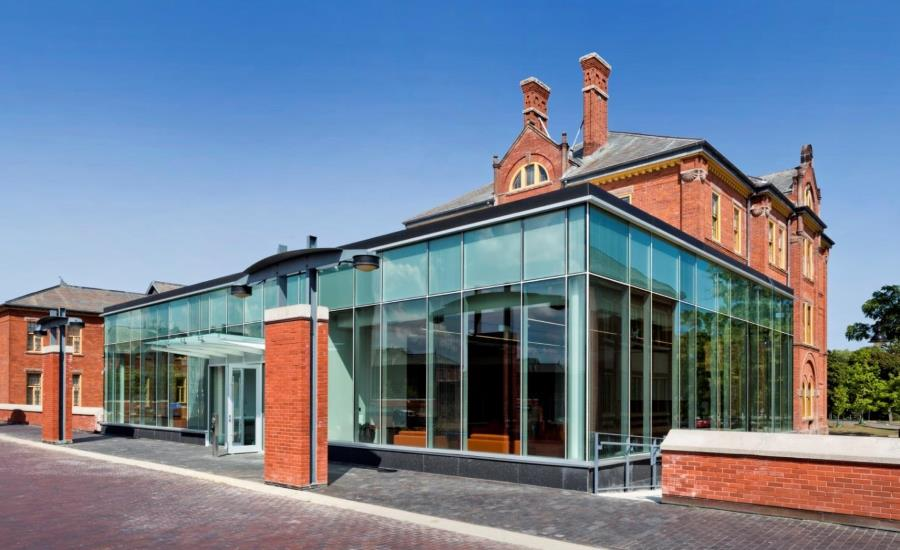

Imagen en escala de grisis.

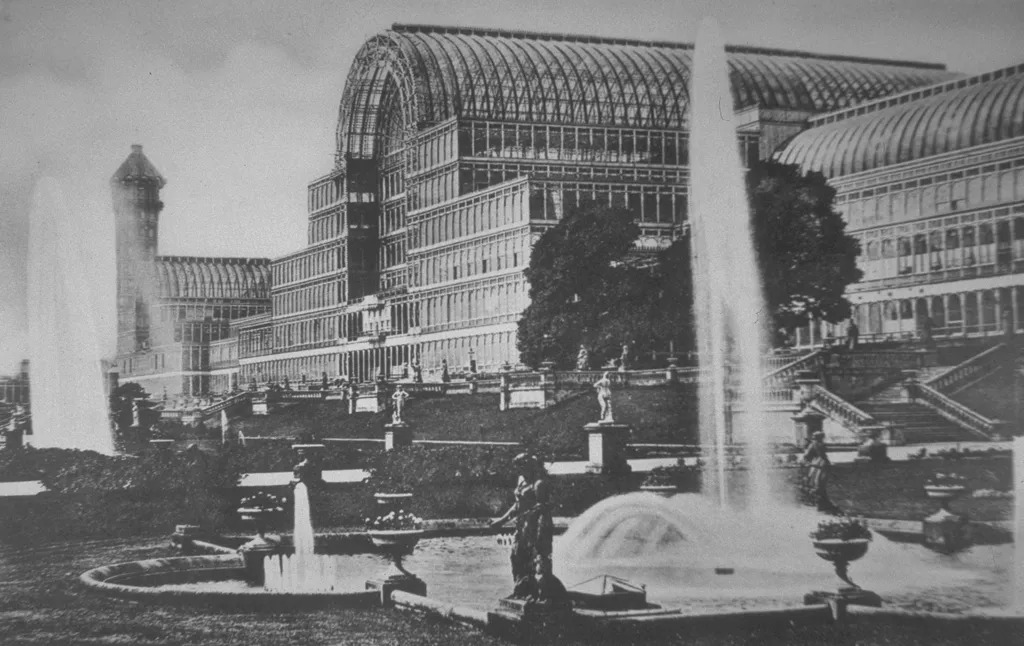

In [7]:
import cv2
import numpy as np

image = cv2.imread('/content/B41.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def moore_neighborhood(image, x, y):
    # This function returns the Moore neighborhood pixels for pixel at (x, y)
    rows, cols = image.shape
    neighbors = []

    for i in range(-1, 2):
        for j in range(-1, 2):
            if 0 <= x + i < rows and 0 <= y + j < cols:
                neighbors.append(image[x + i, y + j])
    return neighbors

rules = {}

for x in range(gray_image.shape[0]):
    for y in range(gray_image.shape[1]):
        neighbors = moore_neighborhood(gray_image, x, y)
        avg_neighbor = sum(neighbors) / len(neighbors)
        rules[avg_neighbor] = image[x, y]

reconstructed_image = np.zeros_like(image)

for x in range(gray_image.shape[0]):
    for y in range(gray_image.shape[1]):
        avg_neighbor = sum(moore_neighborhood(gray_image, x, y)) / 9
        reconstructed_image[x, y] = rules.get(avg_neighbor, [0, 0, 0])  # default to black if no rule

old_image = cv2.imread('/content/B38.jpg', cv2.IMREAD_GRAYSCALE)
colorized_old_image = np.zeros((old_image.shape[0], old_image.shape[1], 3), dtype=np.uint8)

for x in range(old_image.shape[0]):
    for y in range(old_image.shape[1]):
        avg_neighbor = sum(moore_neighborhood(old_image, x, y)) / 9
        colorized_old_image[x, y] = rules.get(avg_neighbor, [0, 0, 0])

Ahora que generamos las imagenes, podemos verlas.

In [8]:
cv2.imwrite('reconstructed_image.jpg', reconstructed_image)
cv2.imwrite('colorized_old_image.jpg', colorized_old_image)

True

Imagen reconstruida a Color

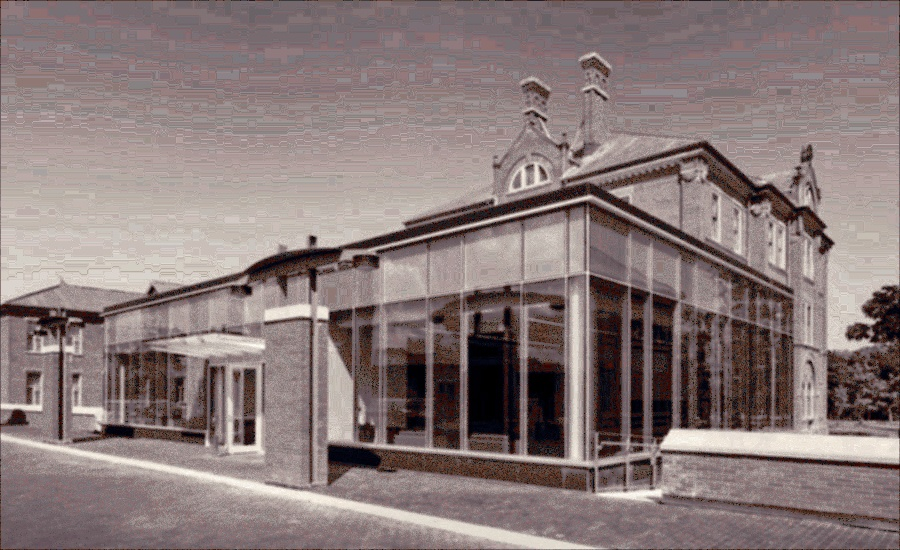

Imagen Reconstruida con las reglas de color.

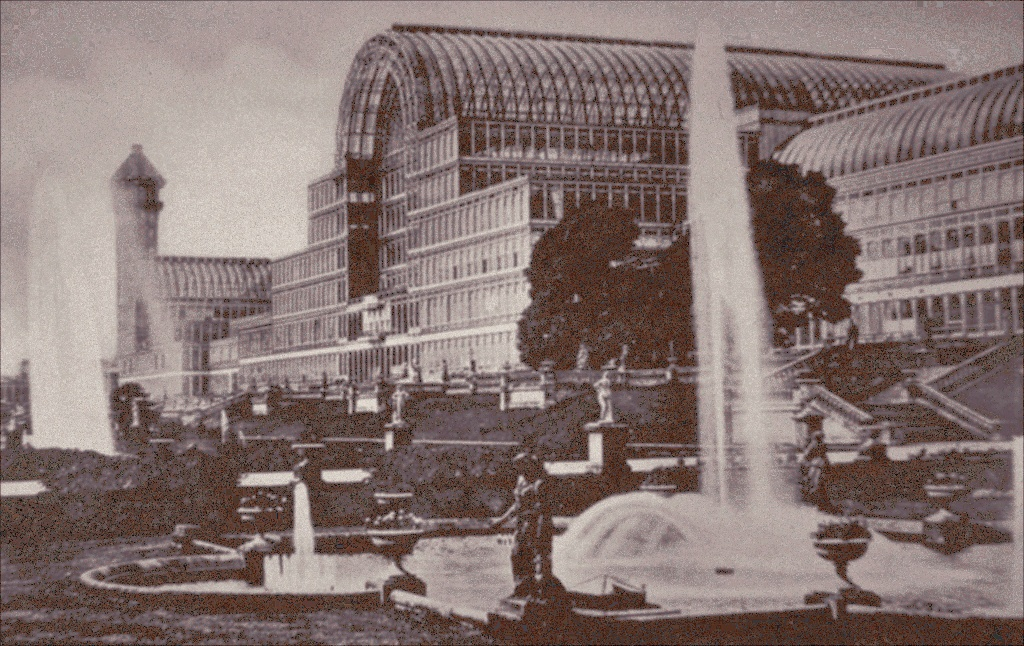